In [110]:
import joblib
import json
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.ensemble import RandomForestClassifier

In [102]:
import sklearn
sklearn.__version__

'1.3.2'

In [100]:
# Train model to use to fast api applications

In [101]:
iris = load_iris()

In [71]:
type(iris)

sklearn.utils._bunch.Bunch

In [72]:
X, y = iris.data, iris.target

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Testing hyperparametrs 
param_grid = {
    "n_estimators": [5, 50, 100, 150, 200, 500],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 50, 100, 150, 200, 500]})

In [75]:
best_params = grid_search.best_params_
best_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [76]:
# Pass best parametres for Random Forest
model = RandomForestClassifier(**best_params, random_state=42)

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=150,
                       random_state=42)

In [78]:
y_pred = model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)

In [80]:
accuracy

1.0

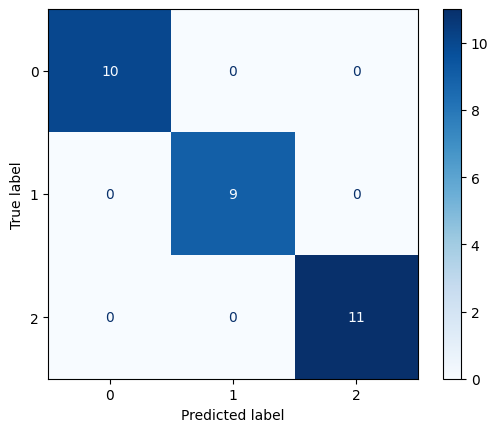

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, model.predict(X_test)))
disp.plot(cmap='Blues')

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [95]:
joblib.dump(model, 'iris_model_fastapi.pkl')

['iris_model_fastapi.pkl']

In [94]:
iris.data, iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [107]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average="weighted"),
    "recall": recall_score(y_test, y_pred, average="weighted"),
    "f1_score": f1_score(y_test, y_pred, average="weighted"),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

In [114]:
with open("model_metrics.json", "w") as f:
    json.dump(metrics, f)